In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/concrete/concrete.csv


In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('/kaggle/input/concrete/concrete.csv')

In [4]:
import numpy as np

In [5]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
x = dataset.drop(['strength'], axis = 1)
x.shape

(1030, 8)

In [8]:
y = dataset['strength']
y.shape

(1030,)

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mms_scaledx = mms.fit_transform(x)
ss_scaledx = ss.fit_transform(x)

sns.pairplot(pd.DataFrame(mms_scaledx))

sns.pairplot(pd.DataFrame(ss_scaledx))

log_x = np.log(x)
log_x = log_x.replace(-np.inf, 0)
sns.pairplot(log_x, diag_kind='kde')

# Correlation

In [10]:
(dataset.corr().loc['strength']).sort_values()

water          -0.289633
fineagg        -0.167241
coarseagg      -0.164935
ash            -0.105755
slag            0.134829
age             0.328873
superplastic    0.366079
cement          0.497832
strength        1.000000
Name: strength, dtype: float64

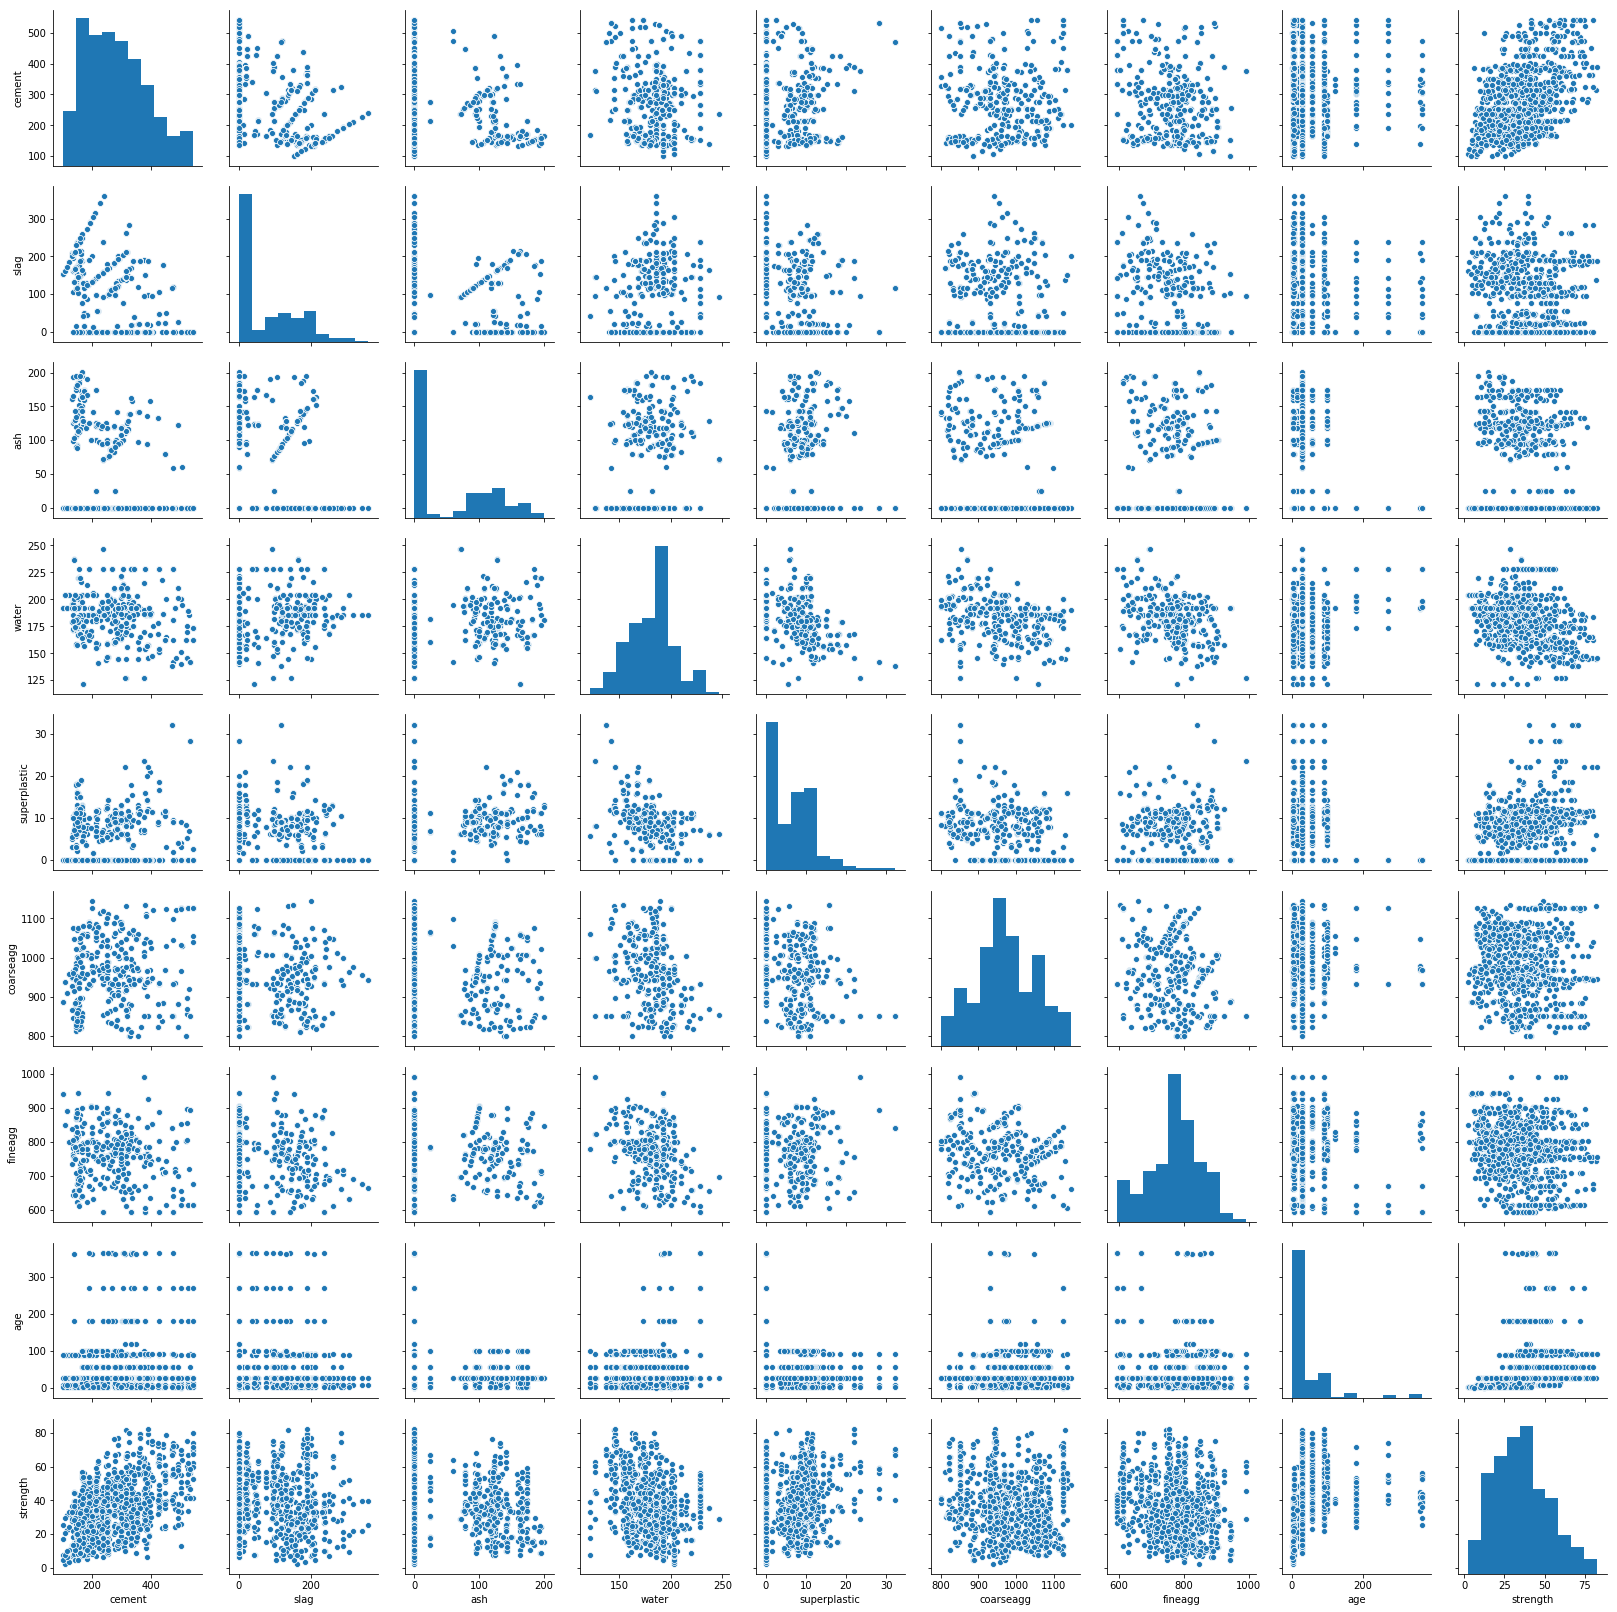

In [11]:
sns.pairplot(dataset)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


cement 5.609105360577134
slag 3.091042453358316
ash -inf
water 5.220355825078324
superplastic 1.8562979903656263
coarseagg 6.875232087276577
fineagg 6.658652655582535
age 3.332204510175204
strength 3.5393629956640513


<Figure size 3600x360 with 0 Axes>

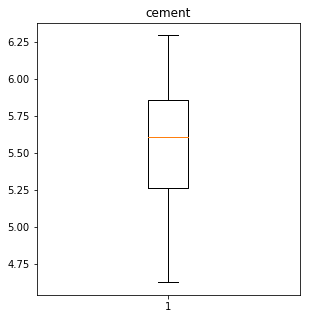

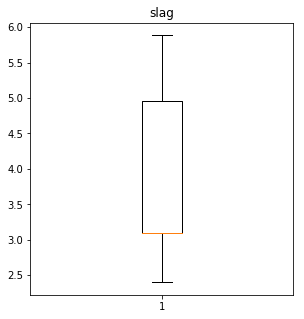

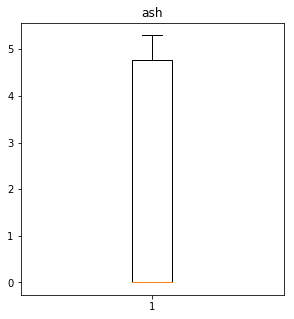

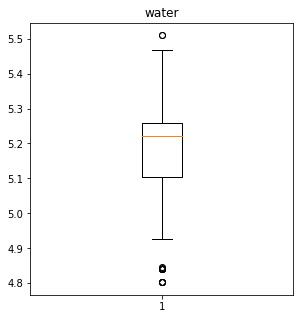

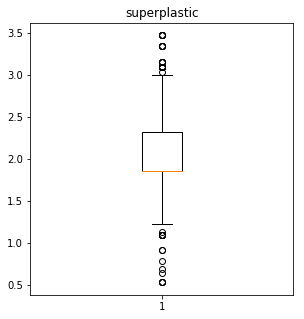

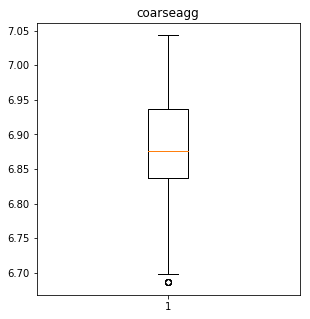

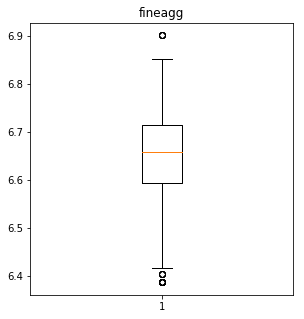

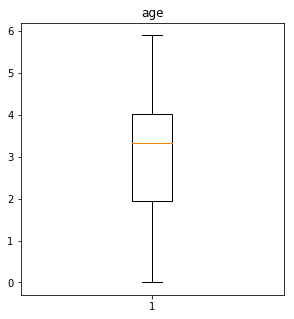

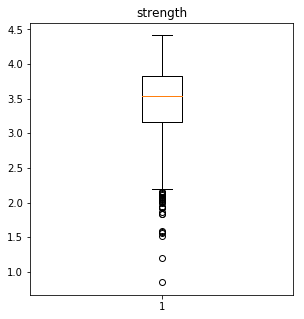

In [12]:

a = 1
plt.figure(figsize=(50,5))
df = np.log(dataset)
for i in df.columns:
    median = df[i].median()
    print(i, median)
    df.loc[df[i] == -np.inf, i] = median
df.loc[df['ash'] == -np.inf, 'ash'] = 0
for i in dataset.columns:
    plt.figure(figsize=(50,5))
    plt.subplot(1, 9, a)
    a+=1
    plt.boxplot(df[i])
    plt.title(i)
#plt.xlabel(x)
#plt.ylabel(y)

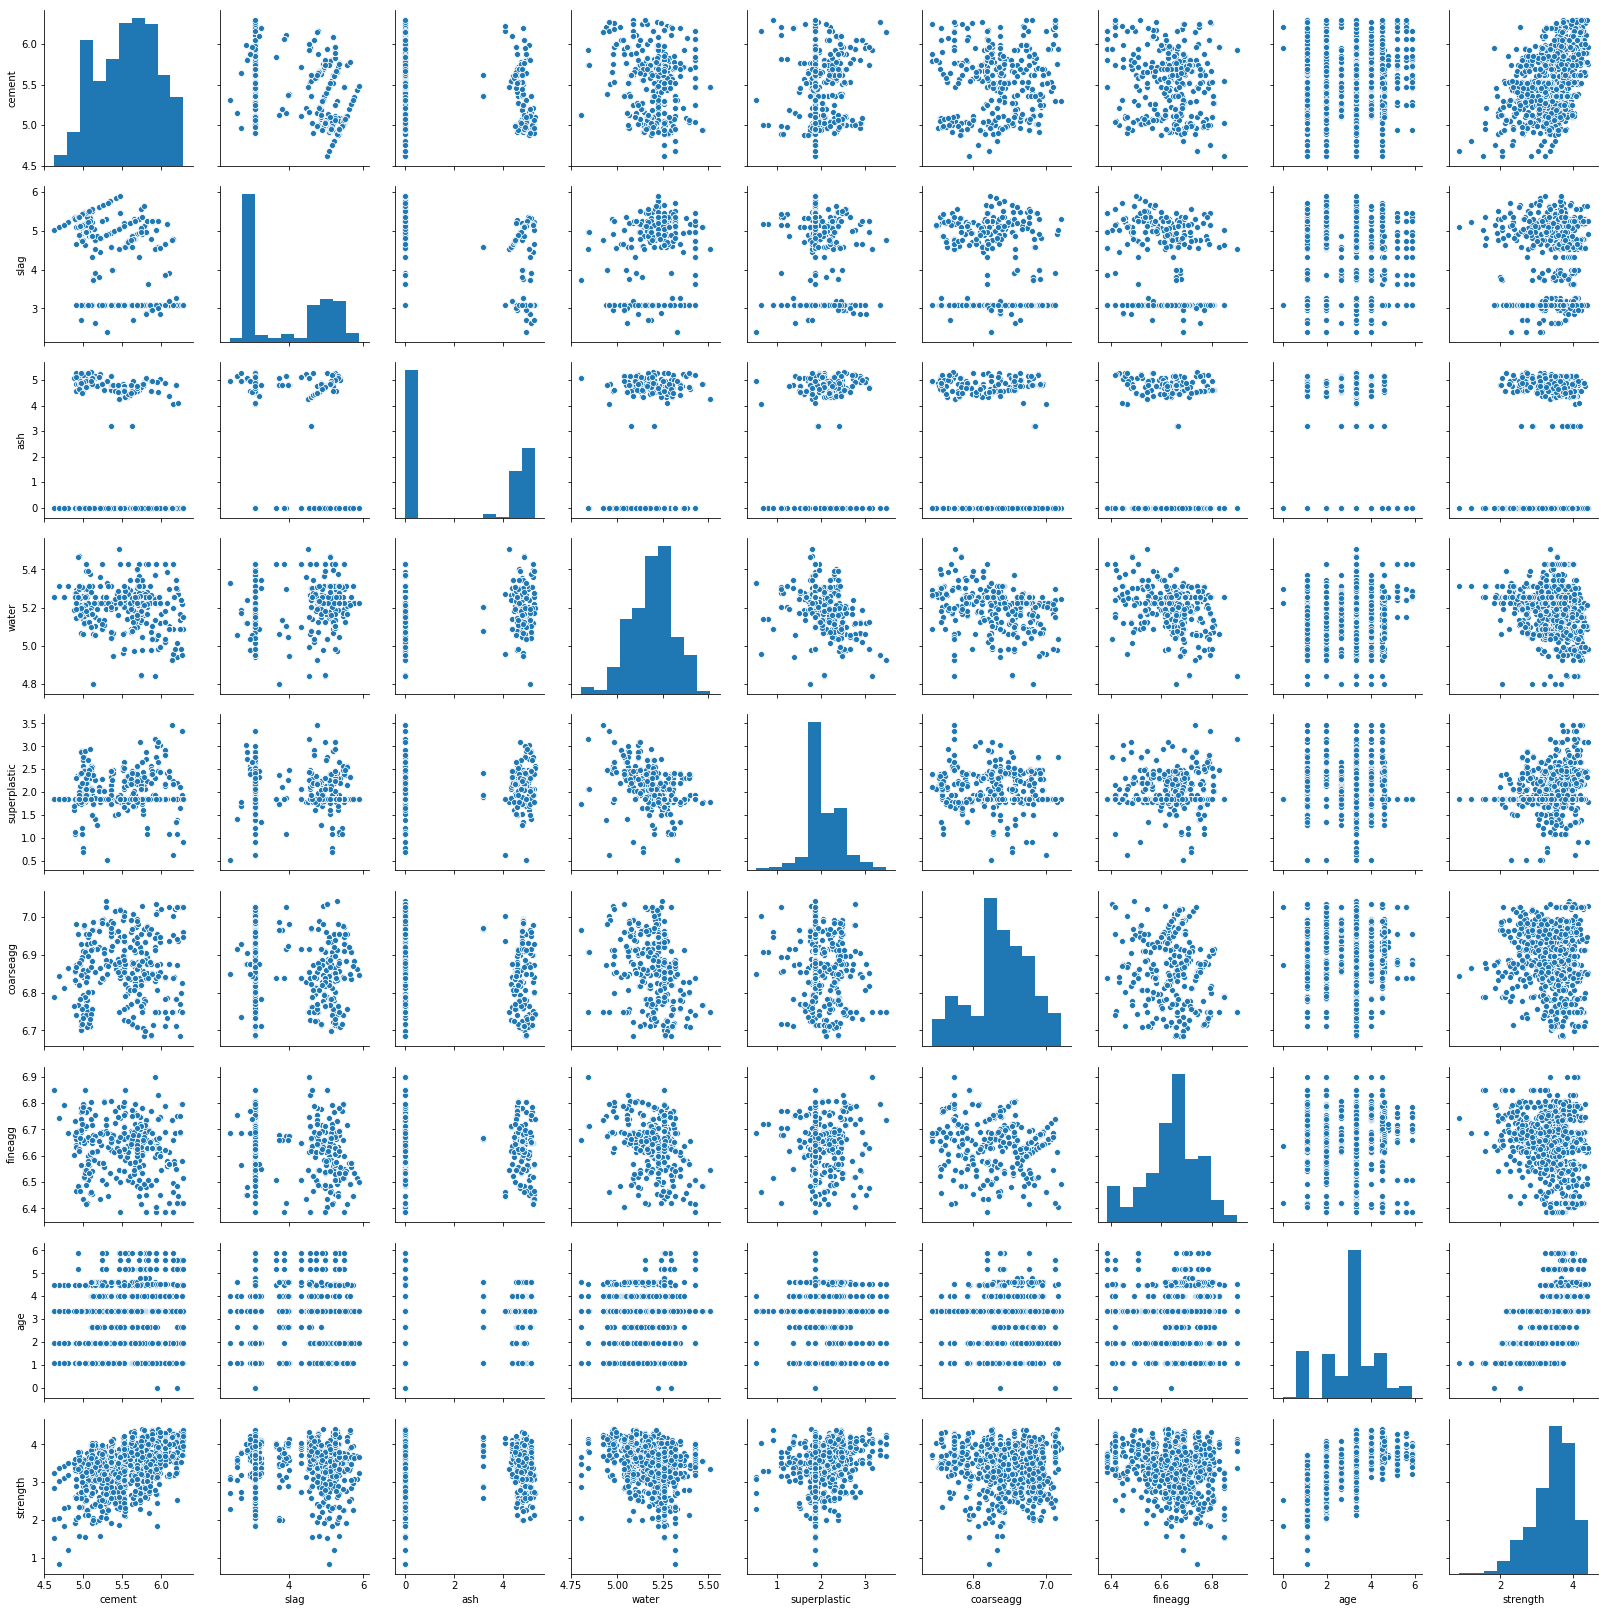

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()
from sklearn.model_selection import train_test_split

In [15]:
trainx, testx, trainy, testy  = train_test_split(x, y,random_state = 1)
scaled_trainx = ss.fit_transform(trainx)
scaled_testx = ss.transform(testx)
lr = LinearRegression()
lr.fit(scaled_trainx, trainy)
print(lr.score(scaled_trainx, trainy))
print(lr.score(scaled_testx, testy))

0.6081240738631453
0.6271242456735369


In [16]:
lr.coef_

array([13.40401911,  9.53278224,  5.96745753, -2.09832975,  2.18515196,
        1.9195593 ,  2.9683178 ,  7.07887093])

In [17]:
x.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [18]:
from sklearn import metrics

In [19]:
y_pred = lr.predict(scaled_testx)
print(metrics.explained_variance_score(testy, y_pred))
print(metrics.mean_absolute_error(testy, y_pred))
print(metrics.r2_score(testy, y_pred))

0.6276709151193326
8.48168443833014
0.6271242456735369


In [20]:
print(y_pred[:10])

[34.87323597 37.00986519 33.22070812 23.64964648 21.29257772 25.86799321
 51.76237672 65.42656736 22.76256518 21.22395866]


In [21]:
print(testy[:10])

339    47.78
244    48.79
882    33.70
567    18.28
923    14.99
358    24.92
576    55.90
27     65.20
994    16.50
563    25.57
Name: strength, dtype: float64
